Loading MNIST dataset...
Preprocessing data...

Training Small Network (64 neurons)...
AttributeError: module 'ml_dtypes' has no attribute 'float8_e3m4'
Small Network (64 neurons) - Test Accuracy: 0.9661

Training Medium Network (128 neurons)...
Medium Network (128 neurons) - Test Accuracy: 0.9701

Training Large Network (256 neurons)...
Large Network (256 neurons) - Test Accuracy: 0.9711

Training Extra Large Network (512 neurons)...
Extra Large Network (512 neurons) - Test Accuracy: 0.9666


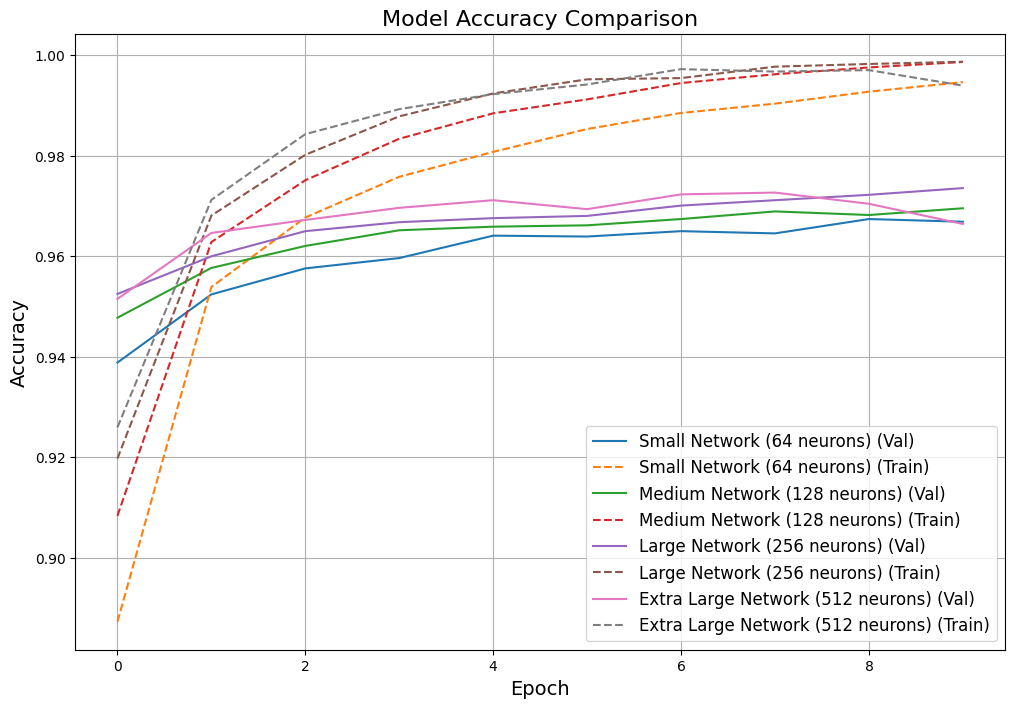


Final Test Accuracy:
Small Network (64 neurons): 0.9661
Medium Network (128 neurons): 0.9701
Large Network (256 neurons): 0.9711
Extra Large Network (512 neurons): 0.9666


In [1]:
# Import necessary libraries
import numpy as np  # For numerical operations
import tensorflow as tf  # For building and training neural networks
from tensorflow.keras import layers, models  # For defining layers and models
from sklearn.datasets import fetch_openml  # For loading the MNIST dataset
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.preprocessing import StandardScaler  # For standardizing the data
import matplotlib.pyplot as plt  # For visualization

# Step 1: Load the MNIST dataset
print("Loading MNIST dataset...")
# Fetch the dataset from OpenML
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
# Extract features (images) and labels
X, y = mnist["data"], mnist["target"].astype(np.uint8)

# Step 2: Preprocess the data
print("Preprocessing data...")
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (mean=0, std=1) to improve training performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test = scaler.transform(X_test)  # Transform test data using the same scaler

# Reshape the data to add a channel dimension (required for neural networks)
X_train = X_train.reshape(-1, 28, 28, 1)  # Reshape to (num_samples, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)  # Reshape to (num_samples, 28, 28, 1)

# Convert labels to one-hot encoding (e.g [0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
y_train = tf.keras.utils.to_categorical(y_train, 10)  # 10 classes (digits 0-9)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Step 3: Define a function to build a neural network
def build_model(neurons, activation='relu'):
    """
    Builds a simple feedforward neural network with one hidden layer.
    
    Args:
        neurons (int): Number of neurons in the hidden layer.
        activation (str): Activation function for the hidden layer (default: 'relu').
    
    Returns:
        model: A compiled Keras model.
    """
    model = models.Sequential()  # Create a sequential model
    model.add(layers.Input(shape=(28, 28, 1)))  # Input layer (28x28 images with 1 channel)
    model.add(layers.Flatten())  # Flatten the input to a 1D vector
    model.add(layers.Dense(neurons, activation=activation))  # Hidden layer with 'neurons' neurons
    model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 neurons (one for each class)
    
    # Compile the model
    model.compile(optimizer='adam',  # Adam optimizer
                  loss='categorical_crossentropy',  # Loss function for multi-class classification
                  metrics=['accuracy'])  # Track accuracy during training
    return model

# Step 4: Define different architectures to test
architectures = {
    "Small Network (64 neurons)": 64,  # Small network with 64 neurons
    "Medium Network (128 neurons)": 128,  # Medium network with 128 neurons
    "Large Network (256 neurons)": 256,  # Large network with 256 neurons
    "Extra Large Network (512 neurons)": 512  # Extra large network with 512 neurons
}

# Step 5: Train and evaluate models
results = {}  # Dictionary to store test accuracy for each model
history_dict = {}  # Dictionary to store training history for each model

for name, neurons in architectures.items():
    print(f"\nTraining {name}...")
    # Build the model
    model = build_model(neurons)
    # Train the model for 10 epochs with a batch size of 128
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=0)
    # Store the training history
    history_dict[name] = history
    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    # Store the test accuracy
    results[name] = test_acc
    print(f"{name} - Test Accuracy: {test_acc:.4f}")

# Step 6: Visualize the training process
plt.figure(figsize=(12, 8))  # Create a figure for the plot
for name, history in history_dict.items():
    # Plot validation accuracy
    plt.plot(history.history['val_accuracy'], label=f'{name} (Val)')
    # Plot training accuracy (dashed line)
    plt.plot(history.history['accuracy'], linestyle='--', label=f'{name} (Train)')

# Add labels, title, and legend
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)  # Add a grid for better readability
plt.show()

# Step 7: Print final test accuracy
print("\nFinal Test Accuracy:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")